In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_auc_score

ابتدا داده‌ها را از دیتاست می‌‌خوانیم.

In [5]:
ds = pd.read_csv('/content/diabetes.csv')

همان طور که مشاهده‌ می شود داده‌های پوچ وجود دارند.

In [6]:
ds.isna().sum()

Unnamed: 0                   0
Diabetes_binary              0
HighBP                       0
High Cholesterol             0
Cholesterol Check            0
BMI                          1
Smoker                       0
Stroke                       0
HeartDiseaseorAttack         1
Physical Activity            1
Fruits                       2
Veggies                      1
Heavy Alcohol Consumption    1
Any Health Care              2
No Doctor because of Cost    2
General Health               1
Mental Health                1
Physical Health              1
Difficulty Walking           2
Sex                          1
Age                          1
Education                    1
Income                       1
dtype: int64

شماره ردیف را حذف می‌کنیم.

داده‌هایی که پوچ هستند را دراپ می‌کنیم.

داده‌های ناشناس را به  دسته‌ی طبقه‌ی ۸ می‌دهیم زیرا این دسته از همه بیش‌تر است.





In [7]:
ds.drop("Unnamed: 0",axis=1,inplace=True)
ds.dropna(inplace=True)
ds.replace('Unknown', 'Cat8', inplace=True)

حال مشاهده می‌کنیم که دیگر داده‌ی پوچی وجود ندارد.

In [8]:
ds.isna().sum()


Diabetes_binary              0
HighBP                       0
High Cholesterol             0
Cholesterol Check            0
BMI                          0
Smoker                       0
Stroke                       0
HeartDiseaseorAttack         0
Physical Activity            0
Fruits                       0
Veggies                      0
Heavy Alcohol Consumption    0
Any Health Care              0
No Doctor because of Cost    0
General Health               0
Mental Health                0
Physical Health              0
Difficulty Walking           0
Sex                          0
Age                          0
Education                    0
Income                       0
dtype: int64

در این قسمت برای عدم بروز مشکل در درخت فاصله‌ی کلمات را حذف می‌کنیم.




In [9]:
ds=ds.rename(columns={"High Cholesterol": "HighCholesterol", "Cholesterol Check": "CholesterolCheck",
 "Physical Activity": "PhysicalActivity", "Heavy Alcohol Consumption": "HeavyAlcoholConsumption",
  "Any Health Care": "AnyHealthCare", "No Doctor because of Cost": "NoDoctorBecauseOfCost",
  "General Health": "GeneralHealth","Mental Health": "MentalHealth", "Physical Health": "PhysicalHealth",
   "Difficulty Walking": "DifficultyWalking"})

همان‌طور که مشاهده می‌شود ستون‌های با فاصله دیگر وجود ندارند.

In [10]:
ds.columns

Index(['Diabetes_binary', 'HighBP', 'HighCholesterol', 'CholesterolCheck',
       'BMI', 'Smoker', 'Stroke', 'HeartDiseaseorAttack', 'PhysicalActivity',
       'Fruits', 'Veggies', 'HeavyAlcoholConsumption', 'AnyHealthCare',
       'NoDoctorBecauseOfCost', 'GeneralHealth', 'MentalHealth',
       'PhysicalHealth', 'DifficultyWalking', 'Sex', 'Age', 'Education',
       'Income'],
      dtype='object')

با روش کمینه-بیشینه برخی ویژگی‌ها را نرمال‌سازی می‌کنیم.

In [11]:
ds["Age"] = (ds["Age"]-ds["Age"].min()) / (ds["Age"].max()-ds["Age"].min())
ds["PhysicalHealth"] = (ds["PhysicalHealth"]-ds["PhysicalHealth"].min()) / (ds["PhysicalHealth"].max()-ds["PhysicalHealth"].min())
ds["BMI"] = (ds["BMI"]-ds["BMI"].min()) / (ds["BMI"].max()-ds["BMI"].min())
ds["MentalHealth"] = (ds["MentalHealth"]-ds["MentalHealth"].min()) / (ds["MentalHealth"].max()-ds["MentalHealth"].min())
ds

,Diabetes_binary,HighBP,HighCholesterol,CholesterolCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysicalActivity,Fruits,...,AnyHealthCare,NoDoctorBecauseOfCost,GeneralHealth,MentalHealth,PhysicalHealth,DifficultyWalking,Sex,Age,Education,Income
0,0.0,1.0,0.0,1.0,0.162791,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,Medium,0.166667,1.000000,0.0,male,0.250000,Cat6,Cat8
1,0.0,1.0,1.0,1.0,0.162791,1.0,1.0,0.0,0.0,1.0,...,1.0,0.0,Medium,0.000000,0.000000,0.0,male,0.916667,Cat6,Cat8
2,0.0,0.0,0.0,1.0,0.162791,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,High,0.000000,0.333333,0.0,male,1.000000,Cat6,Cat8
3,0.0,1.0,1.0,1.0,0.186047,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,Medium,0.000000,0.100000,0.0,male,0.833333,Cat6,Cat8
4,0.0,0.0,0.0,1.0,0.197674,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,Good,0.000000,0.000000,0.0,female,0.583333,Cat5,Cat8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70687,1.0,0.0,1.0,1.0,0.290698,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,Low,0.000000,0.000000,0.0,female,0.416667,Cat4,Cat1
70688,1.0,0.0,1.0,1.0,0.197674,1.0,0.0,1.0,0.0,1.0,...,1.0,0.0,Good,0.000000,0.000000,1.0,male,0.750000,Cat3,Cat6
70689,1.0,1.0,1.0,1.0,0.151163,0.0,0.0,1.0,0.0,1.0,...,1.0,0.0,Very Low,0.500000,0.000000,1.0,female,1.000000,Cat6,Cat4
70690,1.0,1.0,1.0,1.0,0.069767,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,Low,0.000000,0.000000,1.0,female,0.833333,Cat2,Cat4


با دامی‌‌ها ویژگی‌های دسته‌بندی شده را به ویژگی عددی تبدیل می‌کنیم.

In [12]:
ds = pd.get_dummies(ds, columns=['GeneralHealth', 'Sex', 'Education', 'Income'])
ds

,Diabetes_binary,HighBP,HighCholesterol,CholesterolCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysicalActivity,Fruits,...,Education_Cat5,Education_Cat6,Income_Cat1,Income_Cat2,Income_Cat3,Income_Cat4,Income_Cat5,Income_Cat6,Income_Cat7,Income_Cat8
0,0.0,1.0,0.0,1.0,0.162791,0.0,0.0,0.0,1.0,0.0,...,0,1,0,0,0,0,0,0,0,1
1,0.0,1.0,1.0,1.0,0.162791,1.0,1.0,0.0,0.0,1.0,...,0,1,0,0,0,0,0,0,0,1
2,0.0,0.0,0.0,1.0,0.162791,0.0,0.0,0.0,1.0,1.0,...,0,1,0,0,0,0,0,0,0,1
3,0.0,1.0,1.0,1.0,0.186047,1.0,0.0,0.0,1.0,1.0,...,0,1,0,0,0,0,0,0,0,1
4,0.0,0.0,0.0,1.0,0.197674,1.0,0.0,0.0,1.0,1.0,...,1,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70687,1.0,0.0,1.0,1.0,0.290698,0.0,0.0,0.0,0.0,0.0,...,0,0,1,0,0,0,0,0,0,0
70688,1.0,0.0,1.0,1.0,0.197674,1.0,0.0,1.0,0.0,1.0,...,0,0,0,0,0,0,0,1,0,0
70689,1.0,1.0,1.0,1.0,0.151163,0.0,0.0,1.0,0.0,1.0,...,0,1,0,0,0,1,0,0,0,0
70690,1.0,1.0,1.0,1.0,0.069767,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,1,0,0,0,0


ستون باینری دیابت را به عنوان برچسب جدا کرده و داده‌ی ترین و تست را با نسبت ۰.۸ و ۰.۲ جدا می‌کنیم.

In [13]:
X = ds.drop("Diabetes_binary", axis=1)
y = ds["Diabetes_binary"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((56548, 38), (14138, 38), (56548,), (14138,))

مدل طبقه‌بند را ساخته و آن را آموزش می‌دهیم.

In [14]:
model = XGBClassifier(learning_rate=0.1, max_depth=4, n_estimators=200, subsample=0.5, colsample_bytree=1, random_seed=123, eval_metric='auc', verbosity=1)

model.fit(X_train, y_train, 
          early_stopping_rounds=10, 
          eval_set=[(X_test, y_test)], 
          verbose=True)

[0]	validation_0-auc:0.784367
Will train until validation_0-auc hasn't improved in 10 rounds.
[1]	validation_0-auc:0.794231
[2]	validation_0-auc:0.799957
[3]	validation_0-auc:0.803264
[4]	validation_0-auc:0.803983
[5]	validation_0-auc:0.8068
[6]	validation_0-auc:0.8086
[7]	validation_0-auc:0.808803
[8]	validation_0-auc:0.810417
[9]	validation_0-auc:0.812439
[10]	validation_0-auc:0.813108
[11]	validation_0-auc:0.813496
[12]	validation_0-auc:0.814927
[13]	validation_0-auc:0.816285
[14]	validation_0-auc:0.817311
[15]	validation_0-auc:0.818078
[16]	validation_0-auc:0.818753
[17]	validation_0-auc:0.819288
[18]	validation_0-auc:0.820178
[19]	validation_0-auc:0.820664
[20]	validation_0-auc:0.821177
[21]	validation_0-auc:0.821746
[22]	validation_0-auc:0.822243
[23]	validation_0-auc:0.822779
[24]	validation_0-auc:0.823157
[25]	validation_0-auc:0.823494
[26]	validation_0-auc:0.823872
[27]	validation_0-auc:0.82406
[28]	validation_0-auc:0.824404
[29]	validation_0-auc:0.824619
[30]	validation_0-auc

XGBClassifier(eval_metric='auc', max_depth=4, n_estimators=200, random_seed=123,
              subsample=0.5)

حال معیارهای ارزیابی مدل را نشان می‌دهیم.

In [15]:
predict = model.predict(X_test)
print(classification_report(y_test, predict))

              precision    recall  f1-score   support

         0.0       0.77      0.71      0.74      6998
         1.0       0.74      0.79      0.76      7140

    accuracy                           0.75     14138
   macro avg       0.75      0.75      0.75     14138
weighted avg       0.75      0.75      0.75     14138



ماتریس درهم‌ریختگی مشاهده می‌شود.

In [16]:
print(confusion_matrix(y_test, predict))

[[4986 2012]
 [1503 5637]]


امتیاز مدل مشاهده می‌شود.

In [17]:
model.score(X_test, y_test)

0.7513792615645777

هایپرپارامترها را مشاهده می‌کنیم.

In [18]:
XGBClassifier().get_params()

{'base_score': 0.5,
 'booster': 'gbtree',
 'colsample_bylevel': 1,
 'colsample_bynode': 1,
 'colsample_bytree': 1,
 'gamma': 0,
 'learning_rate': 0.1,
 'max_delta_step': 0,
 'max_depth': 3,
 'min_child_weight': 1,
 'missing': None,
 'n_estimators': 100,
 'n_jobs': 1,
 'nthread': None,
 'objective': 'binary:logistic',
 'random_state': 0,
 'reg_alpha': 0,
 'reg_lambda': 1,
 'scale_pos_weight': 1,
 'seed': None,
 'silent': None,
 'subsample': 1,
 'verbosity': 1}

مدل را با ترکیب‌های مختلفی از پارامترهای داده شده تست می‌کنیم.
بهترین مدل را به دست می‌آوریم.
دقت داده‌های تست و آزمون و معیارهای ارزیابی را نشان می‌دهیم.

In [19]:
params={
    'learning_rate': [0.02, 0.05, 0.1, 0.3],
    'max_depth': [2, 3, 4],
    'n_estimators': [100, 200, 300],
    'colsample_bytree': [0.8, 1]
}
def my_roc_auc_score(model, X, y): return roc_auc_score(y, model.predict_proba(X)[:,1])
grids = GridSearchCV(model,param_grid=params,scoring=my_roc_auc_score,cv=3)
grids.fit(X_train, y_train) 
grids.best_params_

{'colsample_bytree': 1,
 'learning_rate': 0.05,
 'max_depth': 3,
 'n_estimators': 300}

In [20]:
grids.best_score_

0.8314622443283408

In [21]:
grids.best_estimator_.score(X_test, y_test)

0.7515207242891498

In [22]:
grids_predict = grids.predict(X_test) 
print(classification_report(y_test, grids_predict))

              precision    recall  f1-score   support

         0.0       0.76      0.72      0.74      6998
         1.0       0.74      0.78      0.76      7140

    accuracy                           0.75     14138
   macro avg       0.75      0.75      0.75     14138
weighted avg       0.75      0.75      0.75     14138



 ماتریس درهم‌ریختگی مشاهده می‌شود.

In [23]:
y_true= y_test
cf_matrix=confusion_matrix(y_true,grids_predict)
cf_matrix


array([[5033, 1965],
       [1548, 5592]])

حال تغییرات پارامترهای بخش قبل را بر روی نمودار می‌بریم تا مشخص شود که چه تاثیری  بر امتیاز می‌گذارد.

Text(0, 0.5, 'score')

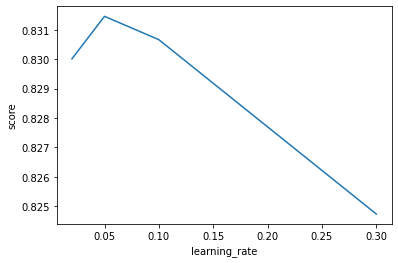

In [24]:
param_list = ['learning_rate', 'max_depth', 'n_estimators', 'colsample_bytree'] 
change = {i: [grids.best_params_[i]] for i in params.keys()}
gridse = {}

td = change.copy()
td['learning_rate'] = params['learning_rate']
gridse['learning_rate'] = GridSearchCV(estimator=model, param_grid=td, cv=3, scoring=my_roc_auc_score).fit(X_train, y_train)
plt.plot(params['learning_rate'], gridse['learning_rate'].cv_results_['mean_test_score'])
plt.xlabel('learning_rate')
plt.ylabel("score")

Text(0, 0.5, 'score')

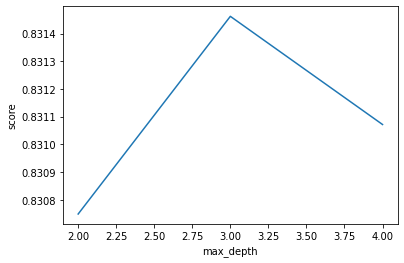

In [25]:
td = change.copy()
td['max_depth'] = params['max_depth']
gridse['max_depth'] = GridSearchCV(estimator=model, param_grid=td, cv=3, scoring=my_roc_auc_score).fit(X_train, y_train)
plt.plot(params['max_depth'], gridse['max_depth'].cv_results_['mean_test_score'])
plt.xlabel('max_depth')
plt.ylabel("score")

Text(0, 0.5, 'score')

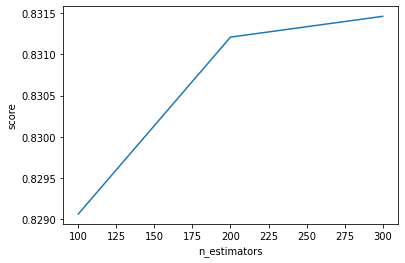

In [26]:
td = change.copy()
td['n_estimators'] = params['n_estimators']
gridse['n_estimators'] = GridSearchCV(estimator=model, param_grid=td, cv=3, scoring=my_roc_auc_score).fit(X_train, y_train)
plt.plot(params['n_estimators'], gridse['n_estimators'].cv_results_['mean_test_score'])
plt.xlabel('n_estimators')
plt.ylabel("score")



Text(0, 0.5, 'score')

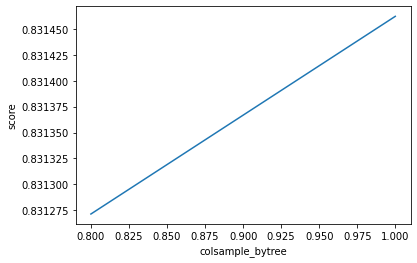

In [27]:
td = change.copy()
td['colsample_bytree'] = params['colsample_bytree']
gridse['colsample_bytree'] = GridSearchCV(estimator=model, param_grid=td, cv=3, scoring=my_roc_auc_score).fit(X_train, y_train)
plt.plot(params['colsample_bytree'], gridse['colsample_bytree'].cv_results_['mean_test_score'])
plt.xlabel('colsample_bytree')
plt.ylabel("score")